<a href="https://colab.research.google.com/github/omonimus1/plant_classification/blob/dev/flower-classifier-notebooks/Transfer_Learning_DenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#changing the working directory and entering to dataset directory for my google drive
# %cd /content/gdrive/Othercomputers/DavideLaptop/Desktop/flower_splitted/flowers_
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from google.colab import drive
import os
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
drive.mount('/content/gdrive/', force_remount=True)
print(os.listdir('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers'))
flowersPath = Path('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers')

# Each species of flower is contained in a separate folder, & this is to get all the
# sub-directories
flowers = os.listdir(flowersPath)  

# re-size all the images to 250x250 size
IMAGE_SIZE = [250, 250]
train_path = '/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train'
valid_path = '/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/test'

Mounted at /content/gdrive/
['test', 'train']


In [13]:
# add preprocessing layer to the front of DenseNet201
densenet = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in densenet.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train/*')

# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 256, 256, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 125, 125, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')


test_set = test_datagen.flow_from_directory('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                            )

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
48/48 [==============================] - 754s 16s/step - loss: 2.7788 - accuracy: 0.7506 - val_loss: 1.2157 - val_accuracy: 0.8264
Epoch 2/4
48/48 [==============================] - 72s 1s/step - loss: 0.4437 - accuracy: 0.9174 - val_loss: 1.5606 - val_accuracy: 0.8048
Epoch 3/4
48/48 [==============================] - 72s 1s/step - loss: 0.2927 - accuracy: 0.9313 - val_loss: 1.1524 - val_accuracy: 0.8341
Epoch 4/4
48/48 [==============================] - 72s 1s/step - loss: 0.1886 - accuracy: 0.9528 - val_loss: 1.2894 - val_accuracy: 0.8233


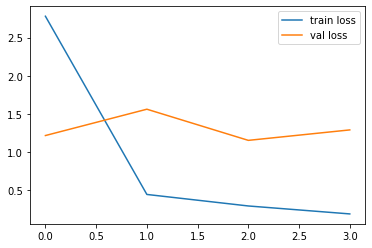

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')